In [1]:
import pandas as pd
spm = pd.read_csv("/content/mail_data.csv")
print(spm)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [2]:
spm.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spm.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
spm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
spm.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
spm.shape

(5572, 2)

In [7]:
spm.columns

Index(['Category', 'Message'], dtype='object')

In [8]:
spm.dtypes

Category    object
Message     object
dtype: object

In [9]:
spm.nunique()

Category       2
Message     5157
dtype: int64

In [10]:
spm.isna().sum()

Category    0
Message     0
dtype: int64

In [11]:
spm["Message"].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

<Axes: xlabel='Message'>

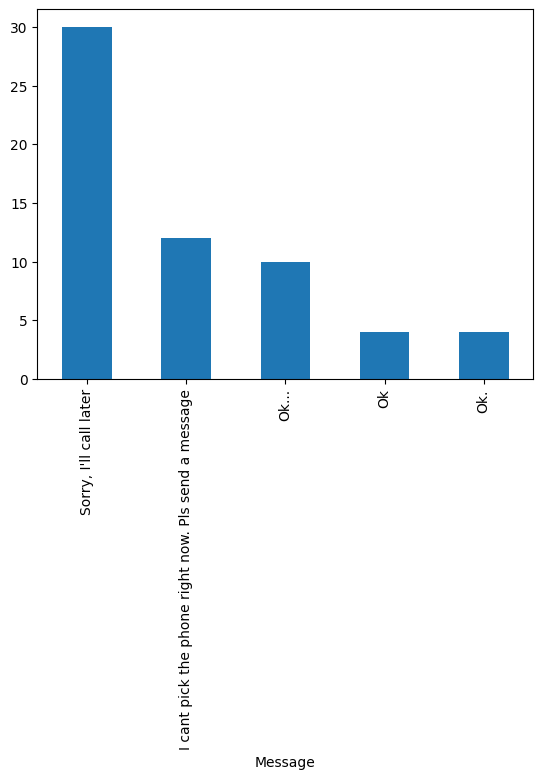

In [12]:
spm["Message"].value_counts().head().plot(kind = "bar")

<Axes: ylabel='count'>

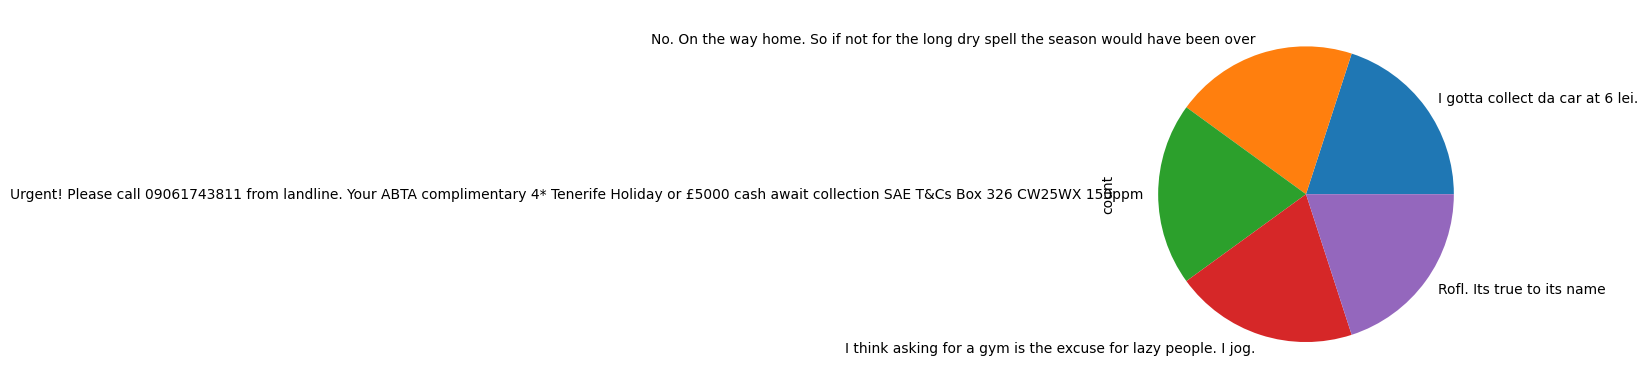

In [13]:
spm["Message"].value_counts().tail().plot(kind = "pie")

In [14]:
spm.iloc[2000:3000]

,Category,Message
2000,ham,LMAO where's your fish memory when I need it?
2001,ham,But i'll b going 2 sch on mon. My sis need 2 t...
2002,ham,Idea will soon get converted to live:)
2003,spam,TheMob>Yo yo yo-Here comes a new selection of ...
2004,ham,S....s...india going to draw the series after ...
...,...,...
2995,ham,"No idea, I guess we'll work that out an hour a..."
2996,ham,Mm not entirely sure i understood that text bu...
2997,ham,They released vday shirts and when u put it on...
2998,ham,Don know..he is watching film in computer..


In [15]:
spm.loc[2000:2500, ["Message"]]

,Message
2000,LMAO where's your fish memory when I need it?
2001,But i'll b going 2 sch on mon. My sis need 2 t...
2002,Idea will soon get converted to live:)
2003,TheMob>Yo yo yo-Here comes a new selection of ...
2004,S....s...india going to draw the series after ...
...,...
2496,WINNER! As a valued network customer you hvae ...
2497,HCL chennai requires FRESHERS for voice proces...
2498,Dai what this da.. Can i send my resume to thi...
2499,"I know where the &lt;#&gt; is, I'll be there..."


In [16]:
#Decision Tree
import pandas as pd
spm = pd.read_csv('/content/mail_data.csv')
spm['Category'] = spm['Category'].map({'ham': 0, 'spam': 1})

X = spm['Message']
y = spm['Category']

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9704035874439462


In [17]:
#Naive Bayes
import pandas as pd
spm = pd.read_csv('/content/mail_data.csv')
spm['Category'] = spm['Category'].map({'ham': 0, 'spam': 1})

X = spm.iloc[:,1:-1].values
y = spm.iloc[:,-1].values

from sklearn.feature_extraction.text import CountVectorizer
X = spm['Message']
y = spm['Category']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB

m = MultinomialNB()
m = m.fit(X_train, y_train)
y_pred1 = m.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

0.9820627802690582


In [18]:
#KNN
import pandas as pd
spm = pd.read_csv('/content/mail_data.csv')
spm['Category'] = spm['Category'].map({'ham': 0, 'spam': 1})

X = spm.iloc[:,1:-1].values
y = spm.iloc[:,-1].values

from sklearn.feature_extraction.text import CountVectorizer
X = spm['Message']
y = spm['Category']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

0.9165919282511211


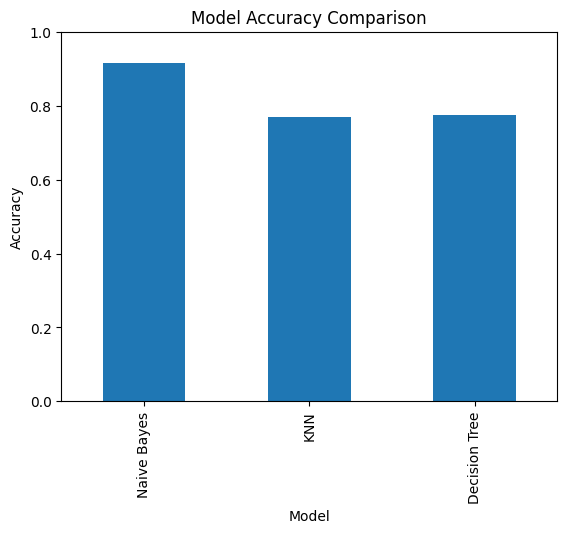

"# Plot the accuracies as a pie chart\naccuracy_df.set_index('Model').plot.pie(y='Accuracy', autopct='%1.1f%%', legend=False, labels=accuracy_df['Model'])\nplt.title('Model Accuracy Distribution')\nplt.ylabel('')  # Hide y-label for better appearance\nplt.show()"

In [19]:
#Plotting the resutls as BAR GRAPH
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracy_nb = accuracy_score(y_test, y_pred2)
accuracy_knn = accuracy_score(y_test, y_pred1)
accuracy_dc = accuracy_score(y_test, y_pred)

# Create a DataFrame for the accuracies
accuracy_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_nb, accuracy_knn, accuracy_dc]
})

# Plot the accuracies as a bar chart
accuracy_df.plot(x='Model', y='Accuracy', kind='bar', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

'''# Plot the accuracies as a pie chart
accuracy_df.set_index('Model').plot.pie(y='Accuracy', autopct='%1.1f%%', legend=False, labels=accuracy_df['Model'])
plt.title('Model Accuracy Distribution')
plt.ylabel('')  # Hide y-label for better appearance
plt.show()'''


In [23]:
#Naive Bayes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

#Prediction
example_messages = ["Oh k...i'm watching here:)", "Is that seriously how you spell his name?", " Oops, I'll let you know when my roommate's done",
"Your free ringtone is waiting to be collected","Your free ringtone is waiting to be collected"," PRIVATE! YOUR 2004 Account Statement"]

def predict_with_m(message):
    vectorized_message = vectorizer.transform([message])
    prediction = m.predict(vectorized_message)
    return "spam" if prediction[0] == 1 else "ham"

example_message = input("Enter a message to predict: ")
print("Prediction for Naive Bayes:", predict_with_m(example_message))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       958
           1       0.98      0.41      0.58       157

    accuracy                           0.92      1115
   macro avg       0.95      0.71      0.77      1115
weighted avg       0.92      0.92      0.90      1115

Enter a message to predict: Your free ringtone is waiting to be collected
Prediction for Naive Bayes: spam
